In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Pyber/data/city_data.csv"
ride_data_to_load = "Pyber/data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(ride_data_df,city_data_df,how="left", on='city')

# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
urban_rides_df_type = merged_df.loc[merged_df["type"] == "Urban", :]
suburban_rides_df_type = merged_df.loc[merged_df["type"] == "Suburban", :]
rural_rides_df_type = merged_df.loc[merged_df["type"] == "Rural", :]

urban_rides_df = urban_rides_df_type.groupby("city")
suburban_rides_df = suburban_rides_df_type.groupby("city") 
rural_rides_df = rural_rides_df_type.groupby("city") 

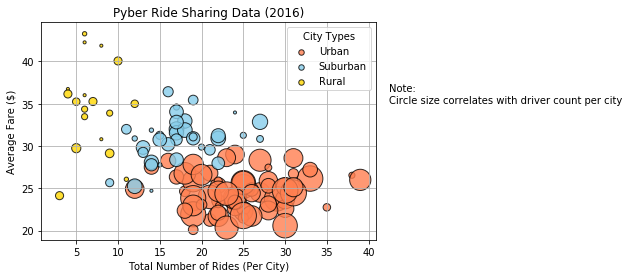

In [3]:
# Obtain the x and y coordinates for each of the three city types

#urban variables
ride_id_urban = urban_rides_df["ride_id"].count()
avg_fare_urban = urban_rides_df["fare"].mean()
drivers_urban = urban_rides_df["driver_count"].mean()


#suburban variables 
ride_id_suburban = suburban_rides_df["ride_id"].count()
avg_fare_suburban = suburban_rides_df["fare"].mean()
drivers_suburban= suburban_rides_df["driver_count"].mean()

#rural variables 
ride_id_rural = rural_rides_df["ride_id"].count()
avg_fare_rural = rural_rides_df["fare"].mean()
drivers_rural = rural_rides_df["driver_count"].mean()



# Build the scatter plots for each city types
urban_plot = plt.scatter(x= ride_id_urban,y=avg_fare_urban, marker="o", s=drivers_urban*9.4,
                         facecolors="coral", edgecolors="black", alpha=.8, linewidths=1)

suburban_plot= plt.scatter(x= ride_id_suburban,y=avg_fare_suburban, marker="o", s=drivers_suburban*9.4,
                           facecolors="skyblue", edgecolors="black", alpha=.8, linewidths=1)

rural_plot= plt.scatter(x= ride_id_rural,y=avg_fare_rural, marker="o", s=drivers_rural*9.4,
                        facecolors="gold", edgecolors="black", alpha=.8, linewidths=1)

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
                                                                                             

# Create a legend and add legend title 
legend =plt.legend((urban_plot, suburban_plot, rural_plot),("Urban","Suburban", "Rural"), 
                   loc="upper right", title= "City Types")

#change the size of the circles in the ledgend 
for handle in legend.legendHandles:
    handle.set_sizes([30])


# Incorporate a text label regarding circle size
plt.text(0.93,0.6, "Note:\nCircle size correlates with driver count per city", fontsize=10,
         transform=plt.gcf().transFigure)

# Save Figure - used tight to print the note
plt.savefig("ride_sharing_data.png",bbox_inches="tight", dpi = 300)
plt.show()

## Total Fares by City Type

In [4]:
urban_rides_df["driver_count"].sum().sum()

59602

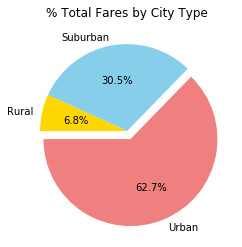

In [5]:
# Calculate Type Percents
#fares total by city type
total_fare_urban = urban_rides_df_type["fare"].sum()
total_fare_suburban = suburban_rides_df_type["fare"].sum()
total_fare_rural = rural_rides_df_type["fare"].sum()

# Build Pie Chart
values = [total_fare_urban, total_fare_suburban,total_fare_rural] 
labels = ['Urban','Suburban','Rural'] 
colors = ["lightcoral", "skyblue", "gold"]
explode = (.1,0,0)

plt.pie(values, labels=labels,colors=colors, explode=explode, autopct='%1.1f%%', shadow=False, 
        startangle=180)
plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig("total_fares_by_city_type.png",bbox_inches="tight", dpi = 300)
plt.show()





## Total Rides by City Type

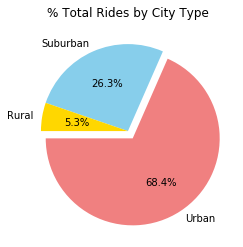

In [6]:
# Calculate Ride Percents
total_rides_urban = urban_rides_df_type["ride_id"].count()
total_rides_suburban = suburban_rides_df_type["ride_id"].count()
total_rides_rural = rural_rides_df_type["ride_id"].count()

# Build Pie Chart
values = [total_rides_urban, total_rides_suburban,total_rides_rural] 
labels = ['Urban','Suburban','Rural'] 
colors = ["lightcoral", "skyblue", "gold"]
explode = (.1,0,0)

plt.pie(values, labels=labels,colors=colors, explode=explode, autopct='%1.1f%%', shadow=False, startangle=180)
plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig("total_rides_by_city_type.png",bbox_inches="tight", dpi = 300)
plt.show()

## Total Drivers by City Type

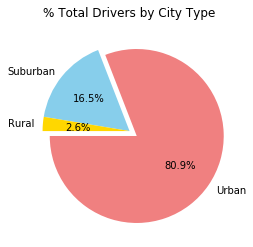

In [7]:
# Calculate Driver Percents

# urban_rides_df = urban_rides_df_type.groupby("city")
# suburban_rides_df = suburban_rides_df_type.groupby("city") 
# rural_rides_df = rural_rides_df_type.groupby("city")

total_drivers_urban = urban_rides_df["driver_count"].mean().sum()
total_drivers_suburban = suburban_rides_df["driver_count"].mean().sum()
total_drivers_rural = rural_rides_df["driver_count"].mean().sum()

# Build Pie Chart
values = [total_drivers_urban, total_drivers_suburban,total_drivers_rural] 
labels = ['Urban','Suburban','Rural'] 
colors = ["lightcoral", "skyblue", "gold"]
explode = (.1,0,0)

plt.pie(values, labels=labels,colors=colors, explode=explode, autopct='%1.1f%%', shadow=False, startangle=180)
plt.title("% Total Drivers by City Type")

# Save Figure
plt.savefig("total_drivers_by_city_type.png",bbox_inches="tight", dpi = 300)
plt.show()




### Observations

You must include a written description of three observable trends based on the data.

* On average there are more drivers in each urban city compare to suburban and rurual.
* On average the price of the ride is higher in suburban and rual cities compare to urban. 
* People take more rides in urban areas compare to rural and suburban areas.